<a href="https://colab.research.google.com/github/Azhar-ali7/Regression-Project-Retail-Sales-Prediction/blob/main/Final_Team_Colab_Rossmann_Sales_Prediction_Regression_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

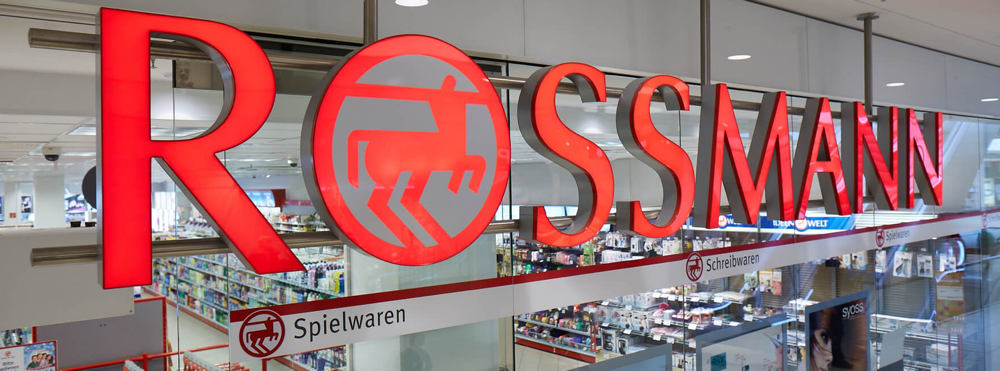

Project Type - Regression

Contribution - Team

Team Member 1-  Mohd Taufique

Team Member 2-  Azhar Ali

Team Member 3-  Pushpam Raghuvanshi

##Project Summary

 
**The first step** in the analysis involved understanding the data, exploring the data,
identifying the variables, and then performed data cleaning like removing the
duplicates, anomaly correction, changing datatype of columns, looking for any null
values and tackling them, filtering records, outlier detections and ways to dealing
them. For the purpose, we import necessary python libraries, load the datasets, and
used various pandas and NumPy built in functions.

**The next step** involved analyzing the different numerical and categorical features
and show the analyzed result using different visualization charts like bar graph,
clustered bar chart, box plot, pie chart, distplot, scatterplot etc. For this purpose, we
used data visualization libraries – seaborn and matplotlib.
The third step involved feature engineering – dealing with categorical variables,
multicollinearity, and at last after all these Data preprocessing steps we go for
applying the Machine Learning algorithm to build a model that will predict the sales
for the test data. For the purpose, we used Supervised ML models like Linear
Regression, Ridge, Lasso, Decision Tree and Random Forest etc. and calculated
evaluation metrics to check the performance.


**The Final step** involved is summing up the key observations and insights developed
during the analysis and ML Model selection. Some key takeaways were: the relation
between the sales and customers is sort of linear, i.e., the sales are increasing with
the increasing number of customers which is obvious. Sales is more when
Promo/Offers are running on stores, Highest sales recorded in December due to
Christmas and New Year. Store with Assortment level ‘b’ has the highest sales. At
last, based on the evaluation metrics we select the Random Forest Hyperparameter
Tuned Model as it is giving the best accuracy compared to other regression models.

##Github Links

Mohd Taufique GitHub Link: - https://github.com/MOHD-TAUFIQUE/Retail-Sales-Prediction_ML-Regression-Project

Azhar Ali GitHub Link: - https://github.com/Azhar-ali7/Regression-Project-Retail-Sales-Prediction

Pushpam Raghuvanshi GitHub Link: - https://github.com/pushpam-raghuvanshi/rossmann_sales_prediction.git

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## <b> Mounting the Google Drive </b>

In [ ]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <b> Importing Libraries </b>

In [ ]:
# Importing Necessary Libraries For Data Wrangling, EDA, Data Pre-Processing & Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## <b> Loading Datasets </b>

In [ ]:
# Loading the Datasets
# Rossmann Stores Data.csv - Historical Data including Sales
file_path_1 = '/content/drive/MyDrive/Retail Sales Prediction- Mohd Taufique/Rossmann Stores Data.csv'
df1 = pd.read_csv(file_path_1, parse_dates = True, index_col = 'Date')
# store.csv - Supplemental information about the stores
file_path_2 = '/content/drive/MyDrive/Retail Sales Prediction- Mohd Taufique/store.csv'
df2 = pd.read_csv(file_path_2)

## <b> Overview of Datasets </b>

In [ ]:
# Checking how big the data is and how data looks for Rossmann Store.csv (df1)
df1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [ ]:
# No. of rows and columns of df1 (rossmann stores)
print('Shape of df1 is', df1.shape)
print('No. of rows in df1 are', df1.shape[0])
print('No. of columns in df1 are', df1.shape[1])

Shape of df1 is (1017209, 8)
No. of rows in df1 are 1017209
No. of columns in df1 are 8


In [ ]:
# Checking how big the data is and how data looks for store.csv (df2)
#print('Number of records and features', df2.shape)
df2.head().T

,0,1,2,3,4
Store,1,2,3,4,5
StoreType,c,a,a,c,a
Assortment,a,a,a,c,a
CompetitionDistance,1270.0,570.0,14130.0,620.0,29910.0
CompetitionOpenSinceMonth,9.0,11.0,12.0,9.0,4.0
CompetitionOpenSinceYear,2008.0,2007.0,2006.0,2009.0,2015.0
Promo2,0,1,1,0,0
Promo2SinceWeek,NaN,13.0,14.0,NaN,NaN
Promo2SinceYear,NaN,2010.0,2011.0,NaN,NaN
PromoInterval,NaN,"Jan,Apr,Jul,Oct","Jan,Apr,Jul,Oct",NaN,NaN


In [ ]:
# No. of rows and columns for df2 (stores datasets)
print('No of rows in the df2 dataset (store) are', df2.shape[0])
print('No of columns in the df2 dataset (store) are', df2.shape[1])

No of rows in the df2 dataset (store) are 1115
No of columns in the df2 dataset (store) are 10


In [ ]:
# Summary/Information of Rossmann Store.csv (df1) regarding it's data type using info() method
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [ ]:
# Summary of store.csv (df2)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


We can see in the above summary of store dataset that total number of rows are 1115 and we can see many columns with missing or null values. We will deal with these null values in the data cleaning/scrubbing part

## <b> Checking for Null Values</b>

In [ ]:
# Analyzing Null Values for both the Datasets
print('df1 \n',df1.isnull().sum(),'\n\n')
print('df2 \n',df2.isnull().sum())

df1 
 Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64 


df2 
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


Observation:- Null values are present in store.csv (df2) dataset only. There is no any missing value available in Rossmann(df1) datasets.



Now we wll calculate the missing value in percentage of df2 (store datasets) only beacuse other dataset (df1) has no null values.


In [ ]:
# Null value (percentage) of total dataset(store).
(df2.isnull().sum()/df2.shape[0])*100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

Observation:- We can see the high percentage of missing/null values in some features of the 'store' dataset(df1). So, now we will try to replace these with some suitable values as they won't help in our model. Let's analyse their distribution.

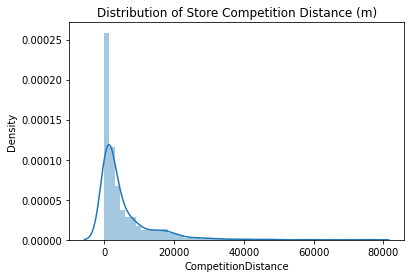

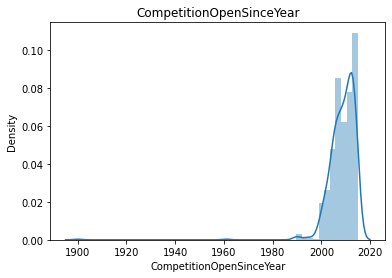

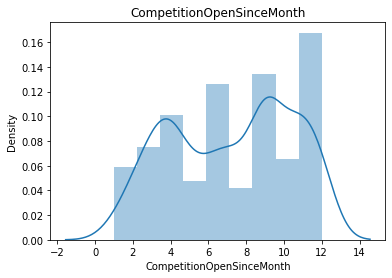

In [ ]:
# Distribution of CompetitionDistance
sns.distplot(df2.CompetitionDistance)
plt.title('Distribution of Store Competition Distance (m)')
plt.show()

# # Distribution of CompetitionOpenSinceYear

plt.title('CompetitionOpenSinceYear')
sns.distplot(df2.CompetitionOpenSinceYear)
plt.show()

# Distribution of CompetitionOpenSinceMonth

plt.title('CompetitionOpenSinceMonth')
sns.distplot(df2.CompetitionOpenSinceMonth)
plt.show()

Dristribution of competition distance is right skewed so we'll replace the missing values with the median.

Since the columns 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' both are categorical columns so we will replace the missing values with mode of particular column and we can see in the above code cell that both columns have only 1 mode.

## <b>Handling Null Values</b>

In [ ]:
# Handling Missing Values
# Replacing NaN values in 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval' by 0
df2['Promo2SinceWeek'] = df2['Promo2SinceWeek'].fillna(0)
df2['Promo2SinceYear'] = df2['Promo2SinceYear'].fillna(0)
df2['PromoInterval'] = df2['PromoInterval'].fillna(0)

# Replacing NaN values in 'CompetitionDistance' with Median 
df2['CompetitionDistance'] = df2['CompetitionDistance'].fillna(df2['CompetitionDistance'].median())

# Replacing NaN values in 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear' with Mode
df2['CompetitionOpenSinceMonth'] = df2['CompetitionOpenSinceMonth'].fillna(df2['CompetitionOpenSinceMonth'].mode().iloc[0])
df2['CompetitionOpenSinceYear'] = df2['CompetitionOpenSinceYear'].fillna(df2['CompetitionOpenSinceYear'].mode().iloc[0])

In [ ]:
# Checking if any Null Value left for any feature
print(df2.isnull().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


## <b> Working with 'Date' Column </b>

In [ ]:
# Extracting year, month, day and week of year from "Date"
df1['Year'] = df1.index.year
df1['Month'] = df1.index.month
df1['Day'] = df1.index.day
df1['WeekOfYear'] = df1.index.weekofyear
df1 = df1.reset_index()

## <b> Checking for Duplicates </b>

In [ ]:
# Checking for duplicates 
print(df1.duplicated().sum())
print(df2.duplicated().sum())

0
0


No duplicates are present in both the datasets.



## <b> Merging both the Datasets </b>

In [ ]:
# Joining/Merging Both the Dataframes 
rossmann_Store_df = pd.merge(df1, df2, how='left', on='Store')

## <b> Understanding the Dataset </b>

In [ ]:
# Using head function, first 5 rows of Merged dataset
rossmann_Store_df.head().T

,0,1,2,3,4
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
Year,2015,2015,2015,2015,2015


In [ ]:
# Using sample function, any random 5 rows of Merged dataset
rossmann_Store_df.sample(5)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
703438,2013-10-09,659,3,6335,705,1,1,0,0,2013,...,41,d,a,1590.0,3.0,2012.0,0,0.0,0.0,0
502693,2014-04-07,614,1,6517,960,1,0,0,0,2014,...,15,a,a,1160.0,12.0,2012.0,0,0.0,0.0,0
107070,2015-04-26,31,7,0,0,0,0,0,0,2015,...,17,d,c,9800.0,7.0,2012.0,0,0.0,0.0,0
743020,2013-09-03,101,2,5345,695,1,0,0,0,2013,...,36,d,c,2440.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
454385,2014-05-20,251,2,19582,2518,1,1,0,0,2014,...,21,a,c,340.0,9.0,2013.0,0,0.0,0.0,0


In [ ]:
# Using tail function, last 5 rows of Merged dataset
rossmann_Store_df.tail()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,2013-01-01,1111,2,0,0,0,0,a,1,2013,...,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,2013-01-01,1112,2,0,0,0,0,a,1,2013,...,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,2013-01-01,1113,2,0,0,0,0,a,1,2013,...,1,a,c,9260.0,9.0,2013.0,0,0.0,0.0,0
1017207,2013-01-01,1114,2,0,0,0,0,a,1,2013,...,1,a,c,870.0,9.0,2013.0,0,0.0,0.0,0
1017208,2013-01-01,1115,2,0,0,0,0,a,1,2013,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
# Using len function, calculating the no. of records in the datset
len(rossmann_Store_df)

1017209

In [ ]:
# Using columns attribute, list of features/columns name in the dataset
rossmann_Store_df.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Checking for duplicates in the merged dataset
rossmann_Store_df.duplicated().sum()

0

In [ ]:
# Summary of merged dataset
rossmann_Store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Date                       1017209 non-null  datetime64[ns]
 1   Store                      1017209 non-null  int64         
 2   DayOfWeek                  1017209 non-null  int64         
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Year                       1017209 non-null  int64         
 10  Month                      1017209 non-null  int64         
 11  Day                        1017209 no

## <b> Changing Datatype of some columns </b>

In [ ]:
# Changing datatype of some columns
rossmann_Store_df['CompetitionOpenSinceMonth'] = rossmann_Store_df['CompetitionOpenSinceMonth'].astype(int)
rossmann_Store_df['CompetitionOpenSinceYear'] = rossmann_Store_df['CompetitionOpenSinceYear'].astype(int)
rossmann_Store_df['Promo2SinceWeek'] = rossmann_Store_df['Promo2SinceWeek'].astype(int)
rossmann_Store_df['Promo2SinceYear'] = rossmann_Store_df['Promo2SinceYear'].astype(int)

In [ ]:
# Description of Numerical columns/features
rossmann_Store_df.describe().round(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.18,2013.83,5.85,15.70,23.62,5422.02,7.79,2010.06,0.5,11.65,1007.01
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.38,0.78,3.33,8.79,14.43,7706.92,2.78,5.34,0.5,15.32,1005.88
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,2013.00,1.00,1.00,1.00,20.00,1.00,1900.00,0.0,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,2013.00,3.00,8.00,11.00,710.00,6.00,2008.00,0.0,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,2014.00,6.00,16.00,22.00,2325.00,9.00,2012.00,1.0,1.00,2009.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,2014.00,8.00,23.00,35.00,6880.00,9.00,2013.00,1.0,22.00,2012.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,1.00,2015.00,12.00,31.00,52.00,75860.00,12.00,2015.00,1.0,50.00,2015.00


## <b> Exploratory Data Analysis </b>

### **Scatter Plot - Sales and Customer**

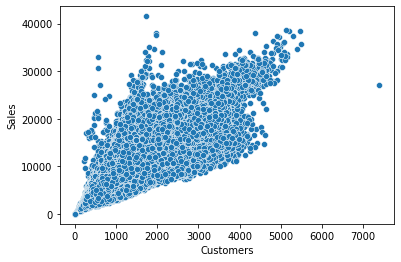

In [ ]:
# Plotting a Scatterplot between Sales and Customers
sns.scatterplot(x = rossmann_Store_df['Customers'], y = rossmann_Store_df['Sales'])

Observation :- Scatterplot shows that relation between Sales and customer is sort of linear. Sales is increasing with the number of Customers increasing which is obvious.

### **Scatter Plot - Sales and CompetitionDistance**

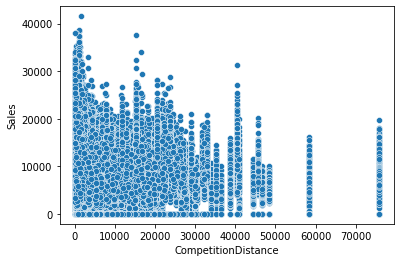

In [ ]:
# Plotting a Scatterplot between Sales and CompetitionDistance
sns.scatterplot(x = rossmann_Store_df['CompetitionDistance'], y = rossmann_Store_df['Sales'])

Observation:-
From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

### **Distribution of 'Sales'**

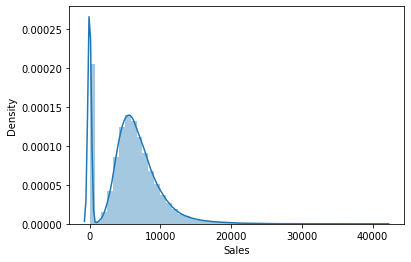

In [ ]:
# distribution plot
sns.distplot(rossmann_Store_df['Sales'])

Observation:- Here it can be esily observed that there are many zero sales value and also a few negative which we will remove and deal with later on. Also the sales distribution is slightly right skewed which shows presence of few outliers which may be because of promo offer and that is justifiable as well.

### **Countplot - Store Open Closed**

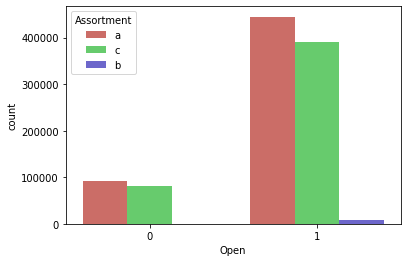

In [ ]:
# Plotting a Countplot of Store Open Closed
sns.countplot(x = rossmann_Store_df["Open"], hue = rossmann_Store_df['Assortment'], palette = 'hls')

Observation - 
1. Some stores of Assortment level 'a' and 'c' are closed.
2. Assortment level 'a' stores are highest.
3. Assortment level 'b' stores are very few.

### **Sales over Year**

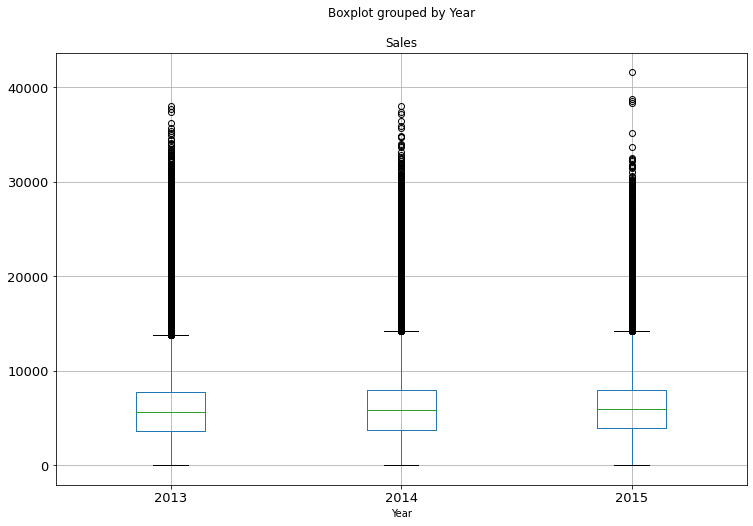

In [ ]:
#Boxplot showing sales variation over year
rossmann_Store_df.boxplot('Sales', 'Year', figsize= (12,8), fontsize=13 )

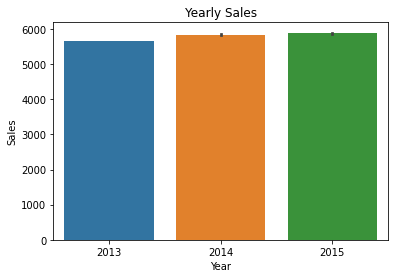

In [ ]:
# Plotting Bar plot showing Total Yearly Sales
sns.barplot(x='Year', y='Sales', data=rossmann_Store_df).set(title='Yearly Sales')
plt.show()

*   Observation - Little increase in sales in successive year.

### **Sales over Month**

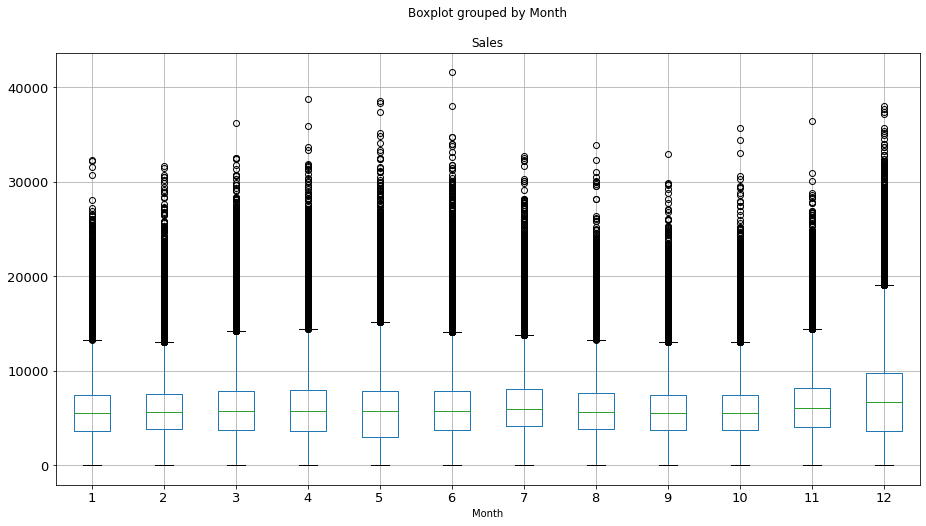

In [ ]:
# Boxplot Shwoing Sales variation over Monthh
rossmann_Store_df.boxplot('Sales', 'Month', figsize= (15,8), fontsize=13 )

Text(0.5, 1.0, 'Average Sales per Month')

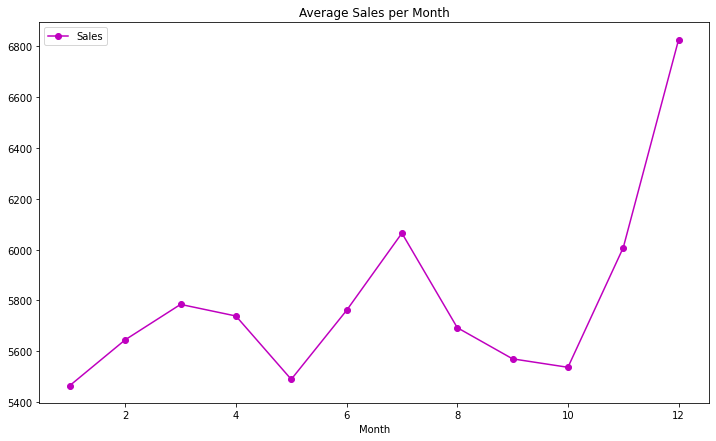

In [ ]:
# Avg sales per month
fig_c = rossmann_Store_df.groupby('Month')[['Sales']].mean().plot(figsize = (12,7), marker = 'o', color = 'm')
fig_c.set_title('Average Sales per Month')

Text(0.5, 1.0, 'Average Customers per Month')

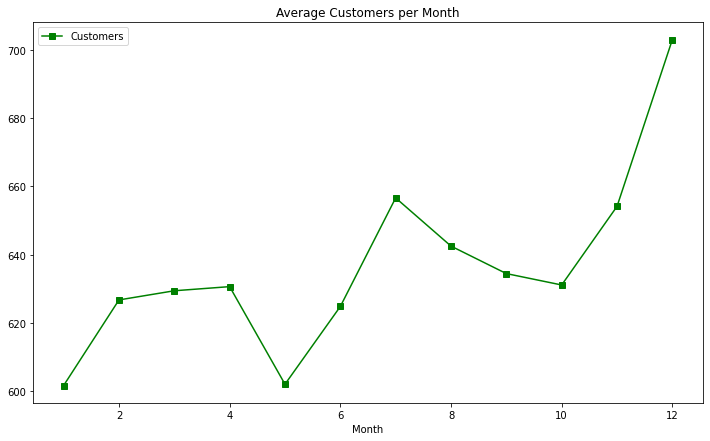

In [ ]:
# Avg customers per month
fig_d = rossmann_Store_df.groupby('Month')[['Customers']].mean().plot(figsize = (12,7), marker = 's', color = 'g')
fig_d.set_title('Average Customers per Month')

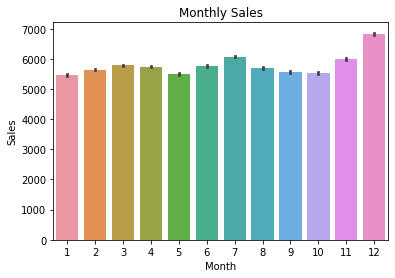

In [ ]:
# Plotting Bar plot showing Total Monthly Sales
sns.barplot(x = 'Month', y = 'Sales', data = rossmann_Store_df).set(title = 'Monthly Sales')
plt.show()

Observation:- We can observe the significant increase in sales and number of customers in the month of december. This may be because of Christmas Holidays.

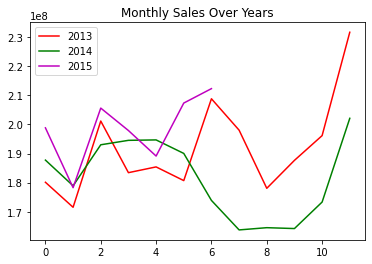

In [ ]:
#sales over the years
sales_df_2013 = rossmann_Store_df[rossmann_Store_df['Year']== 2013]
sales_df_2014 = rossmann_Store_df[rossmann_Store_df['Year']==2014]
sales_df_2015 = rossmann_Store_df[rossmann_Store_df['Year']== 2015]
#monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()
#plotting
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='r')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='g')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='m')
plt.title('Monthly Sales Over Years')
plt.legend()

Key Observation:-
Sales rise up by the end of the year before the holidays. Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.

### **Sales vs Promo**

[Text(0.5, 1.0, 'Sales vs Promo')]

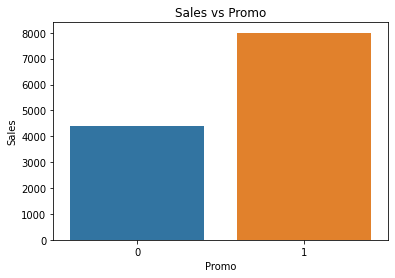

In [ ]:
# Plotting Bar plot showing Sales vs Promo
sns.barplot(x ='Promo',y ='Sales',data = rossmann_Store_df).set(title = 'Sales vs Promo')

*   Observation - More sales when promos are running.

### **Sales vs Assortment**

[Text(0.5, 1.0, 'Assortment vs Sales')]

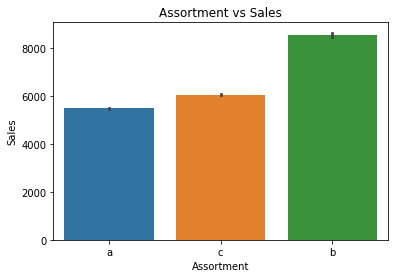

In [ ]:
# Plotting Bar plot showing Sales vs Assortment
sns.barplot(x = 'Assortment', y = 'Sales', data =rossmann_Store_df).set(title = 'Assortment vs Sales')

Observation:- Asortment Level 'b' has the highest sales and Level 'a' has the lowest sales.

### **Sales vs School Holiday**

[Text(0.5, 1.0, 'Sales vs School Holiday')]

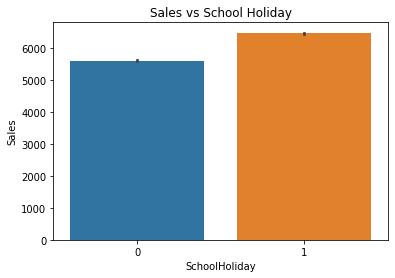

In [ ]:
# Plotting Bar plot showing Sales vs SchoolHoliday
sns.barplot(x = 'SchoolHoliday', y = 'Sales', data =rossmann_Store_df).set(title = 'Sales vs School Holiday')

*   Observation - More sales on School Holidays.

### **Sales vs Day of Week**

Text(0.5, 1.0, 'Average sales by day of the week')

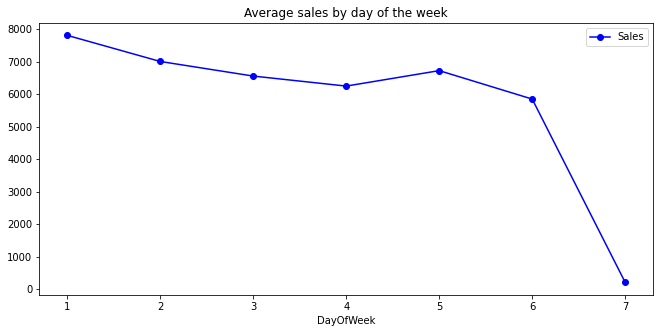

In [ ]:
# Average salesplot
fig_a = rossmann_Store_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (11,5), marker = 'o', color = 'b')
fig_a.set_title('Average sales by day of the week')

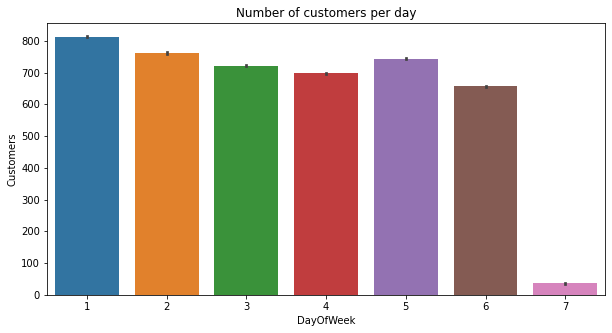

In [ ]:
# Customers per day
fig,(figure1) = plt.subplots(1,figsize = (10, 5))

figure1.title.set_text('Number of customers per day')
sns.barplot(x = 'DayOfWeek', y = 'Customers', data = rossmann_Store_df, order = [1,2,3,4,5,6,7], ax = figure1)

Text(0.5, 1.0, 'Average number of customers per day of the week')

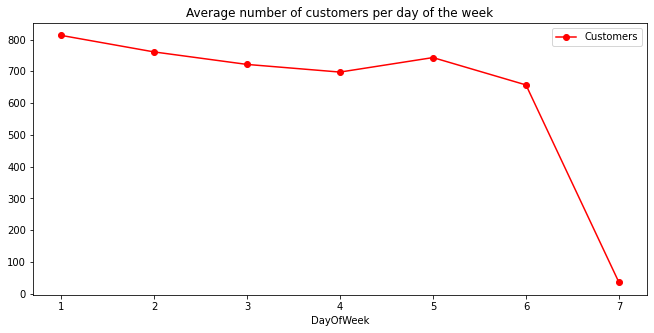

In [ ]:
# Avg customers plot
fig_b = rossmann_Store_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (11,5), marker = 'o', color = 'r')
fig_b.set_title('Average number of customers per day of the week')

[Text(0.5, 1.0, 'Sales vs Day of Week')]

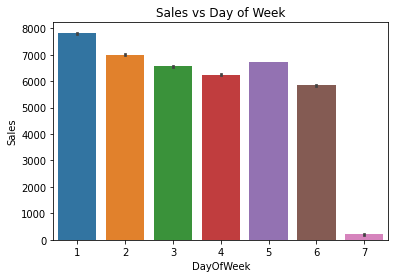

In [ ]:
# Plotting Bar plot showing Sales vs Day of Week
sns.barplot(x = 'DayOfWeek', y = 'Sales',data = rossmann_Store_df).set(title = 'Sales vs Day of Week')

Observation - 
1. More sales on Monday, Tuesday and Friday.
2. Sunday has the lowest sale.

### **Store Open/Closed Over Day Of week**

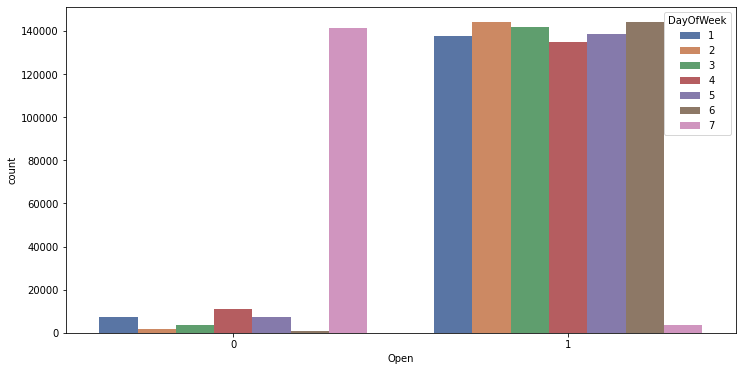

In [ ]:
# Opened and closed stores in a week
fig, (fig6) = plt.subplots(1,1, figsize = (12,6))
sns.countplot(x = 'Open', hue = 'DayOfWeek', data = rossmann_Store_df, palette= 'deep', ax = fig6)

Key Insights:- This countplot clearly shows that majority of stores are closed on sunday. Some stores were also closed on other days of the week may be due to public holidays & refurbishment, as stores are usually closed on public holidays and are open during school vacations.

### **Sales vs StoreType**

[Text(0.5, 1.0, 'Sales vs StoreType')]

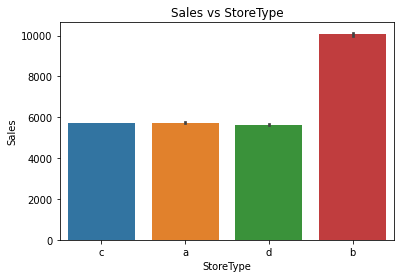

In [ ]:
# Plotting Bar plot showing Sales vs Store Type
sns.barplot(x = 'StoreType', y = 'Sales', data = rossmann_Store_df).set(title = 'Sales vs StoreType')

Observation:- StoreType 'b' has the highest sales.

### **Proportion of StoreTypes**

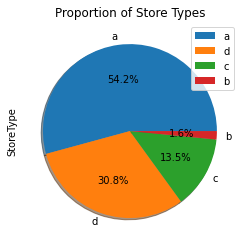

In [ ]:
# Plotting Pie chart showing percentage of Store Types
store_type = rossmann_Store_df['StoreType'].value_counts()
store_type.plot.pie(title='Proportion of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

Observation - 
1. Approximately 50% Stores are of type 'a'.
2. There are only few Stores of type 'b' (1.6%).

### **Customer Proportion per StoreType**

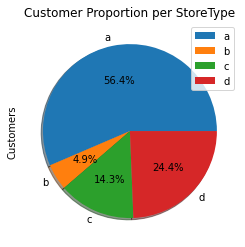

In [ ]:
# Plotting pie chart to show proportion of customer visit per store Type
cust = rossmann_Store_df.groupby('StoreType')['Customers'].sum()
cust.plot.pie(title='Customer Proportion per StoreType', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

Observation - 
1. Store type 'a' has the most number of customers visit.
2. Very few customers visits Store type 'b'.

## <b> Feature Engineering </b>

In [ ]:
# Making a copy of Dataframe (rossmann_df) and further working on it
final_df  = rossmann_Store_df.copy()

In [ ]:
# Filtering stores which are closed as they wont generate sales
final_df = final_df[final_df.Open != 0]

In [ ]:
# Dropping Open column as it is not a variable anymore
final_df = final_df.drop('Open', axis=1)

In [ ]:
# Stores with zero Sales
final_df[final_df.Sales == 0]['Store'].sum()

31460

In [ ]:
# Percentage of open stored with zero sales
final_df[final_df.Sales == 0]['Store'].sum()/final_df.Sales.sum().round(2) * 100

0.0005356552440563345

In [ ]:
# Filtering rows with Sales > 0
final_df = final_df[final_df.Sales != 0]

In [ ]:
# Checking
final_df[final_df.Sales == 0]['Store'].sum()

0

In [ ]:
# list of columns in final_df dataframe
final_df.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Description of Numerical columns/features
final_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Store,844338.0,558.42,321.73,1.0,280.0,558.0,837.0,1115.0
DayOfWeek,844338.0,3.52,1.72,1.0,2.0,3.0,5.0,7.0
Sales,844338.0,6955.96,3103.82,46.0,4859.0,6369.0,8360.0,41551.0
Customers,844338.0,762.78,401.19,8.0,519.0,676.0,893.0,7388.0
Promo,844338.0,0.45,0.50,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,844338.0,0.19,0.40,0.0,0.0,0.0,0.0,1.0
Year,844338.0,2013.83,0.78,2013.0,2013.0,2014.0,2014.0,2015.0
Month,844338.0,5.85,3.32,1.0,3.0,6.0,8.0,12.0
Day,844338.0,15.84,8.68,1.0,8.0,16.0,23.0,31.0
WeekOfYear,844338.0,23.65,14.39,1.0,11.0,23.0,35.0,52.0


In [ ]:
# Summary of final_df
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date                       844338 non-null  datetime64[ns]
 1   Store                      844338 non-null  int64         
 2   DayOfWeek                  844338 non-null  int64         
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  object        
 7   SchoolHoliday              844338 non-null  int64         
 8   Year                       844338 non-null  int64         
 9   Month                      844338 non-null  int64         
 10  Day                        844338 non-null  int64         
 11  WeekOfYear                 844338 non-null  int64  

### <b>Dealing with Categorical Variables</b>

In [ ]:
# Nominal Variales
set(final_df.StateHoliday), set(final_df.StoreType), set(final_df.Assortment), set(final_df.PromoInterval)

({0, '0', 'a', 'b', 'c'},
 {'a', 'b', 'c', 'd'},
 {'a', 'b', 'c'},
 {0, 'Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'})

In [ ]:
# Converting number 0 to string 0 in StateHoliday column
final_df.loc[final_df.StateHoliday == 0,'StateHoliday'] = final_df.loc[final_df.StateHoliday == 0,'StateHoliday'].astype(str)

In [ ]:
# Converting number 0 to string 0 in promointerval column
final_df.loc[final_df.PromoInterval == 0,'PromoInterval'] = final_df.loc[final_df.PromoInterval == '0','PromoInterval'].astype(str)

### **Sales vs State Holiday**

[Text(0.5, 1.0, 'Sales vs StateHoliday')]

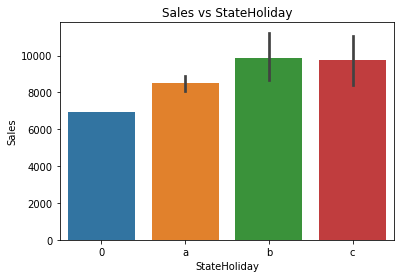

In [ ]:
# Plotting a Bar chart showing Sales vs State Holiday
sns.barplot(x='StateHoliday', y='Sales', data = final_df).set(title='Sales vs StateHoliday')

a = public holiday, b = Easter holiday, c = Christmas, 0 = None

Observation - 
1. More Sales on Easter holiday(b) and Christmas(c).
2. Sales non holiday is less.

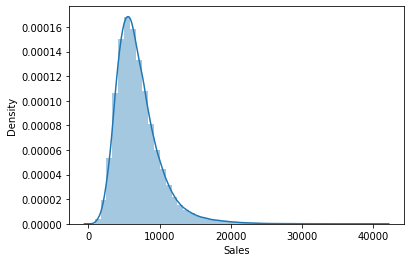

In [ ]:
# Distribution of sales after we drop the closed store.
sns.distplot(final_df['Sales'])

In [ ]:
# Transfromation
#rossmann_Store_df['Sales'] = np.log10(rossmann_Store_df['Sales'])

In [ ]:
# Dropping -inf values
final_df.drop(final_df[final_df['Sales'] == float("-inf")].index,inplace=True)

In [ ]:
# Encoding all categorical varibale to numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

final_df['StoreType'] = label_encoder.fit_transform(final_df['StoreType'])
final_df['Assortment'] = label_encoder.fit_transform(final_df['Assortment'])
final_df['StateHoliday'] = label_encoder.fit_transform(final_df['StateHoliday'])
final_df['PromoInterval'] = label_encoder.fit_transform(final_df['PromoInterval'])

final_df.head().T

,0,1,2,3,4
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
Year,2015,2015,2015,2015,2015
Month,7,7,7,7,7


### **Correlation Heatmap**

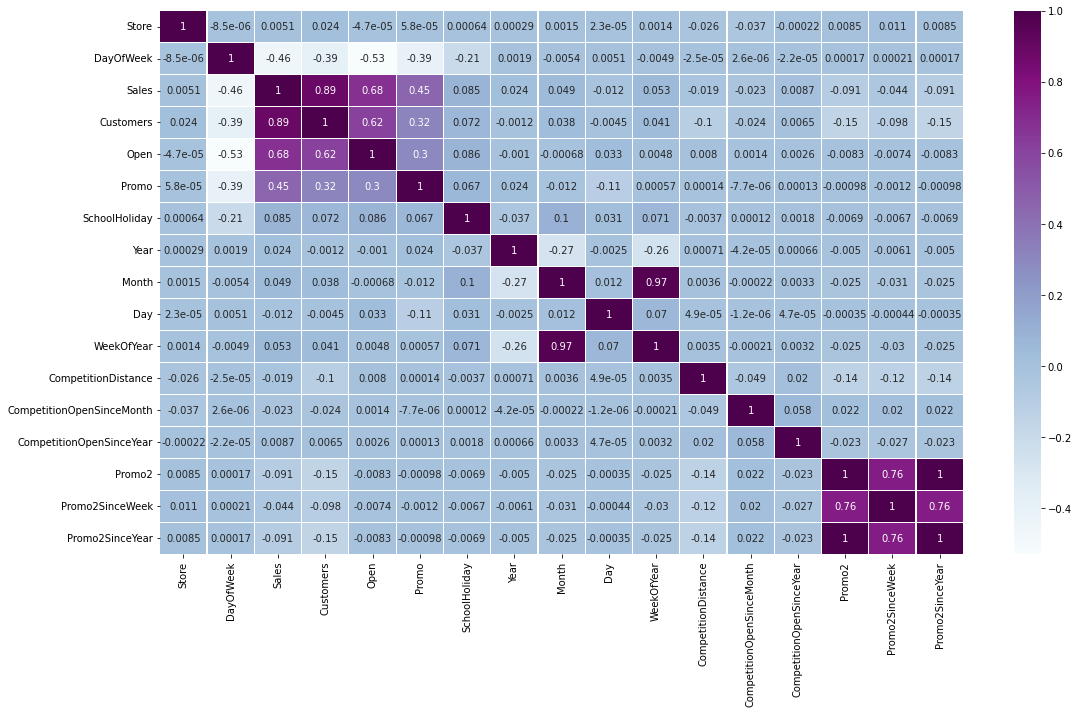

In [ ]:
# Correlation
correlation = rossmann_Store_df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(correlation, annot=True, linewidths=0.2, cmap='BuPu')

Observation - 
1. Sales have high correlation with Customers, Open.
2. Month and WeekOfYear have high correlation 0.97.
3. Promo2 anf Promo2SinceYear have highest correlation = 1.
4. Alo, Promo2 and Promo2SinceWeek have correlation of 1.



### <b> Multicollinearity </b>

In [ ]:
# Creating a list of all numerical features.
num_features = list(final_df.describe().columns)

# removing 'Store' (ID), 'Sales' (target variable) and 'WeekofYear' because we alrealy have 'Year'
num_features.remove('Store')
num_features.remove('Sales')


num_features

['DayOfWeek',
 'Customers',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day',
 'WeekOfYear',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [ ]:
# Number/count of numerical features
len(num_features)

18

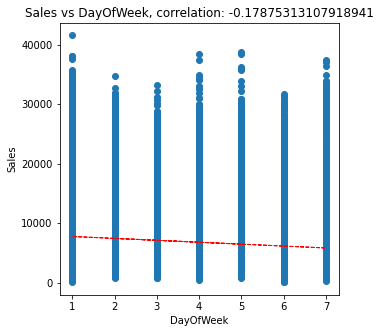

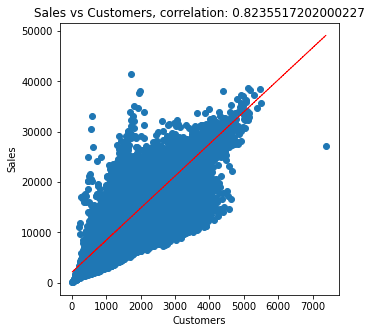

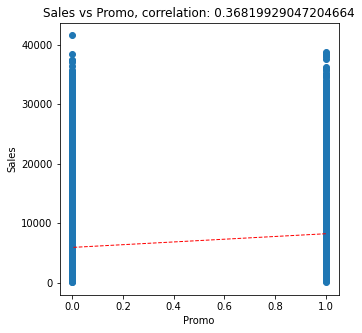

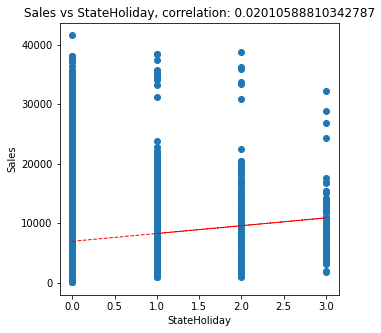

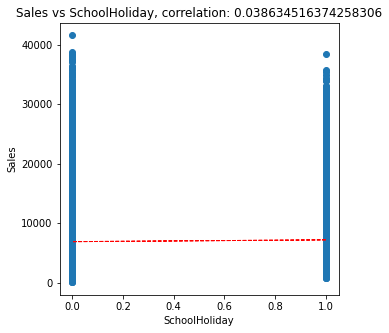

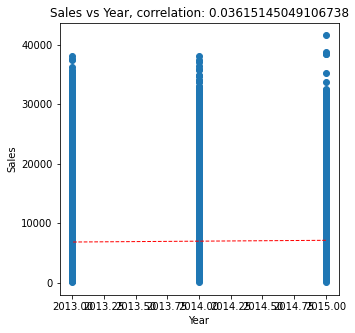

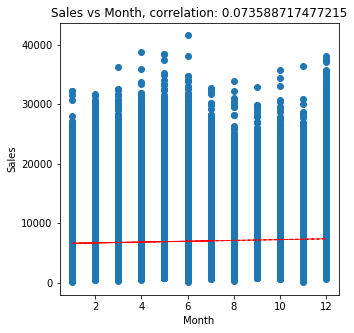

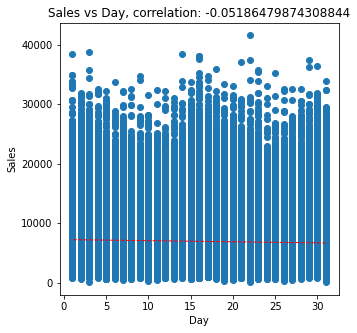

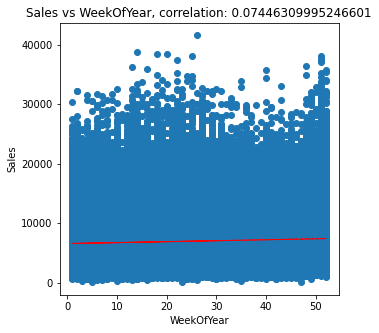

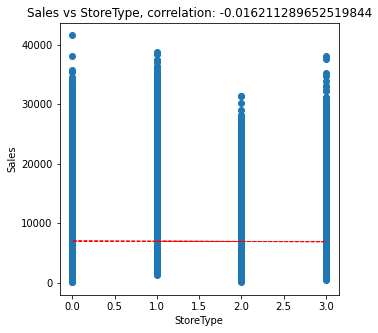

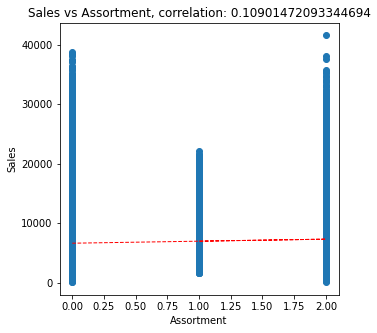

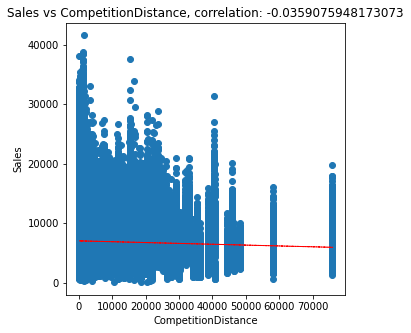

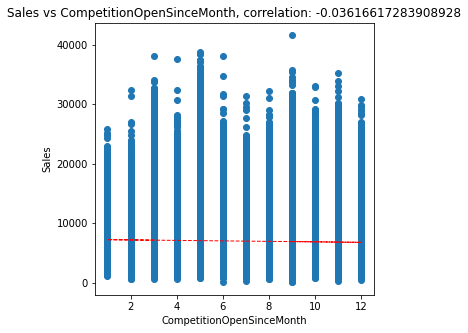

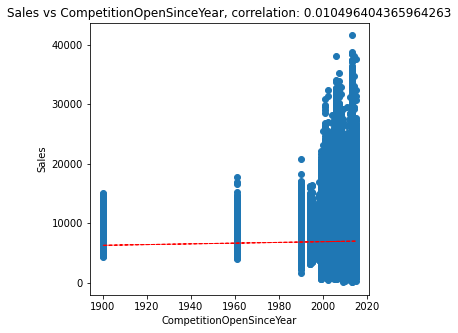

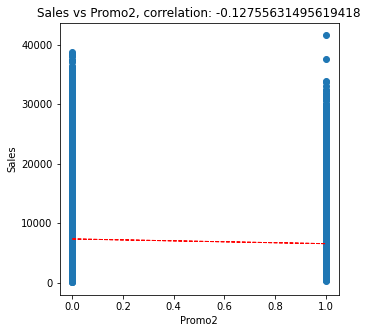

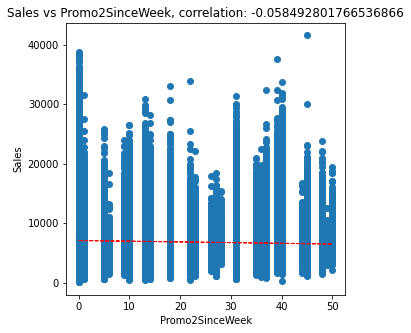

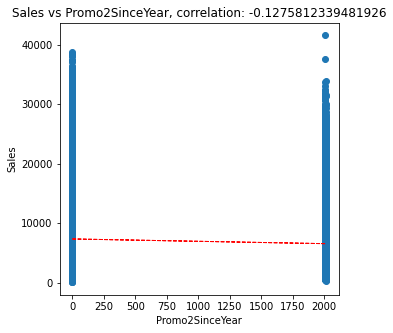

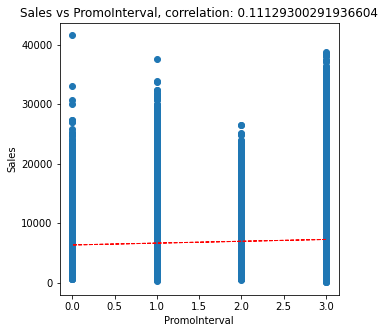

In [ ]:
# Plotting the relationship between each numerical features and the target (Sales) variable
for i in num_features:
  fig = plt.figure(figsize = (5,5))
  feature = final_df[i]
  label = final_df['Sales']
  
#   # correlation coefficient
  correlation = feature.corr(label)

#   # plot
  plt.scatter(feature,label)
  plt.xlabel(i)
  plt.ylabel('Sales')
  plt.title('Sales vs ' +i+ ', correlation: '+ str(correlation))
  # getting best fit line for each relationship
  slope, intercept = np.polyfit(feature, label, 1)
  plt.plot(feature, slope*feature + intercept, "r--", lw = 1)
plt.show()

In [ ]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# Computing VIF to check multicollinearity
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,4.031611e+00
1,DayOfWeek,5.770616e+00
2,Customers,5.415796e+00
3,Promo,2.077486e+00
4,StateHoliday,1.004371e+00
5,SchoolHoliday,1.308349e+00
6,Year,1.414599e+05
7,Month,5.707905e+01
8,Day,4.584867e+00
9,WeekOfYear,5.126733e+01


In [ ]:
# Removing the features which is having VIF>10 because it will affect & interpret the result. 
#VIF <10 is usually preferred as this can easily explain the variance of 90% i.e, R-square becomes 90%.(VIF=1/1-R^2)
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Sales','Promo2SinceYear','Year','CompetitionOpenSinceYear','Month','WeekOfYear','PromoInterval']]])


,variables,VIF
0,Store,3.627575
1,DayOfWeek,4.513547
2,Customers,4.339790
3,Promo,1.946273
4,StateHoliday,1.003985
5,SchoolHoliday,1.247951
6,Day,3.847661
7,StoreType,1.916142
8,Assortment,2.049916
9,CompetitionDistance,1.532510


 Now for each feature VIF values is below to 10. That's look pretty fine. VIF <= 10 is usually preferred as this can easily explain the variance of 90% i.e, R-square becomes 90%.(VIF=1/1-R^2)

### <b> Boxplot </b>

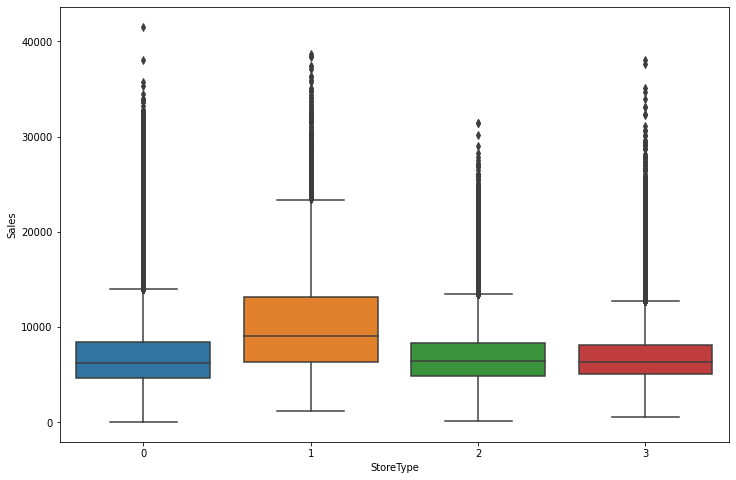

In [ ]:
# Boxplot showing five point summary for Sales vs Store Type
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'StoreType', y = 'Sales', data = final_df)

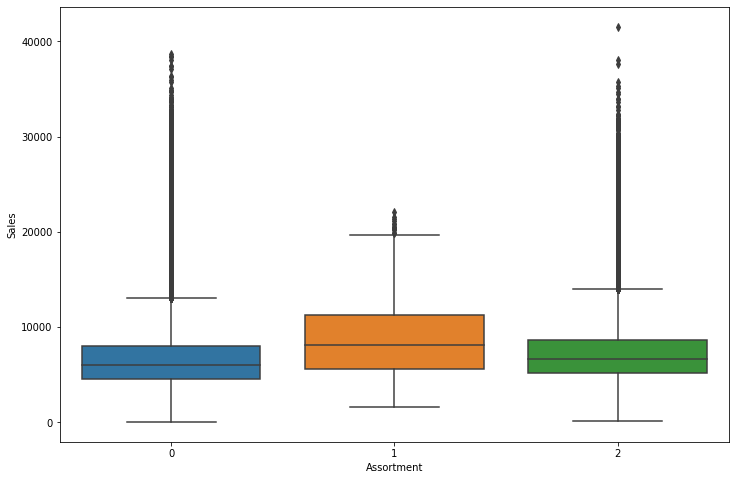

In [ ]:
# Boxplot showing Five point summary for Sales vs Assortment
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Assortment', y = 'Sales', data = final_df)

## <b> Conclusion from EDA </b>

1. There are 2 datasets- <b>i. Rossmann Stores Data.csv (1017209,8) & ii. store.csv (1115, 10).</b>
2. There are Nan values present in store. csv dataset.
3. 'Store' column is common in both the dataset. 
4. After combining both the datasets the shape of merged dataset becomes  (1017209,18).
5. There are no duplicates in both the datasets.
6. StateHoliday, StoreType, Assortment, PromoInterval are Categorical features.

7. From Scatterplot, the relation between Sales and customer is sort of linear. Sales is increasing with the number of Customers increasing which is obvious.
8. Store Open Closed countplot shows that some stores of Assortment level 'a' and 'c' are closed. Also, Assortment level 'a' stores are highest and
Assortment level 'b' stores are very few.
9. Little Increase in sales successive years.
10. December records the highest monthly sales. This may be due to Christmas eve and New Year.
11. More sales when promos are running on stores.
12. Asortment Level 'b' has the highest sales and Level 'a' has the lowest sales.
13. More sales on School Holidays.
14. More sales on Monday, Tuesday and Friday. Sunday has the lowest sale.
15. StoreType 'b' has the highest sales and all other StoreType namely a, c, d has nearly equal sales.
16. Approximately 50% Stores are of type 'a'. There are only few Stores of type 'b' (1.6%).
17. Store type 'a' has the most number of customers visit. Very few customers visits Store type 'b'.
18. The outliers in the dataset showed justifiable behaviour. The outliers were either of store type b or had promotion going on which increased sales.
19. Store type 'b' though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.
20. Most stores have competition distance with low range and had more sales than stores far away probably indicating competition in busy locations vs remote locations.




## **Rossmann Sales Prediction - ML Model Building**

- This ML Model will predict sales only on stores which are open and when there is some sales because there is no sales when store is closed.

In [ ]:
# Importing Machine Learning & Evaluation Metrics Libraries
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
# Defining Dependent Variable
dependent_variable = 'Sales'
# Defining Independent Varibale
independent_variables = list(final_df.columns.drop(['Date','Sales','Store']))

In [ ]:
# List of independent variables
independent_variables

['DayOfWeek',
 'Customers',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day',
 'WeekOfYear',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [ ]:
# Creating the data of independent variables
X = final_df[independent_variables].values

# Creating the data of dependent variable
y = final_df[dependent_variable].values

In [ ]:
# Splitting the Dataset into Test and Train
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
# Shape of train data
print(X_train.shape)
# Shape of test data
print(X_test.shape)

(675470, 18)
(168868, 18)


### **Model - 1 - Linear Regression (OLS)**

In [ ]:
# Fitting Multiple Linear Regression to the Training set
# Formation of equation
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Intercept of equation
regressor.intercept_

-345128.7246962925

In [ ]:
# Coefficients OR Model parameters of equation
regressor.coef_

array([-6.68250445e+01,  6.36639925e+00,  1.28927404e+03, -1.29655171e+03,
        3.73208586e+01,  1.76164646e+02,  4.83488362e+01,  1.26350928e+00,
       -2.01507690e+00,  2.72825866e+02,  2.16569624e+02,  2.83537985e-02,
       -1.34633742e+01, -4.25686165e+00,  1.24371840e+05,  1.01443774e+01,
       -6.19162081e+01, -9.33297059e+01])

In [ ]:
# Predicting the Train set results
y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred_test = regressor.predict(X_test)

In [ ]:
# Defining RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# Defining MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100 

In [ ]:
# Evaluation Metrics for Linear Regression

print("Regresion Model Training Score" , ":" , regressor.score(X_train, y_train),
      "Model Test Score" ,":" , regressor.score(X_test, y_test))

print("Training RMSE", ":", rmse(y_train, y_pred_train),
      "Testing RMSE", ":", rmse(y_test, y_pred_test))

print("Training MAPE", ":", mape(y_train, y_pred_train),
      "Testing MAPE", ":", mape(y_test, y_pred_test))

r2 = r2_score(y_test, y_pred_test)
print("R2 :" ,r2)

Regresion Model Training Score : 0.7651156469492955 Model Test Score : 0.7611592650795758
Training RMSE : 1503.6989257731054 Testing RMSE : 1519.1318498576056
Training MAPE : 15.85935493567883 Testing MAPE : 15.901627612723109
R2 : 0.7611592650795758


Text(0, 0.5, 'Predicted values')

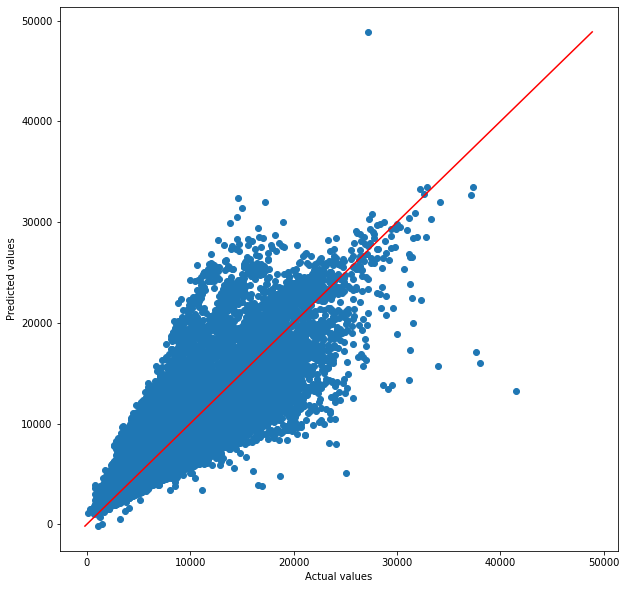

In [ ]:
# Showing the optimally fitted line
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred_test)

p1 = max(max(y_pred_test),max(y_test))
p2 = min(min(y_pred_test),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

### **Model - 2 - Lasso Regression (L1)**

In [ ]:
# Fitting Lasso Regression to the Training set
lasso = Lasso(alpha = 0.2, max_iter=10000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.2, max_iter=10000)

In [ ]:
# Predicting the Test set results
y_pred_lasso = lasso.predict(X_test)

In [ ]:
# Predicting the Train set results
y_pred_train_lasso = lasso.predict(X_train)

In [ ]:
# Evaluation Metrics for Lasson Regression (L1)

print("Regresion Model Training Score" , ":" , lasso.score(X_train, y_train),
      "Model Test Score" ,":" , lasso.score(X_test, y_test))

print("Training RMSE", ":", rmse(y_train, y_pred_train_lasso),
      "Testing RMSE", ":", rmse(y_test, y_pred_lasso))

print("Training MAPE", ":", mape(y_train, y_pred_train_lasso),
      "Testing MAPE", ":", mape(y_test, y_pred_lasso))

r2 = r2_score(y_test, y_pred_lasso)
print("R2 :" ,r2)

Regresion Model Training Score : 0.7646132677472558 Model Test Score : 0.76069082892657
Training RMSE : 1505.306149826781 Testing RMSE : 1520.62084983915
Training MAPE : 15.88202979785686 Testing MAPE : 15.920246670740632
R2 : 0.76069082892657


### **Model - 3 - Ridge Regression (L2)**

In [ ]:
# Fitting Ridge Regression to the Training set
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
# Predicting the Test set results
y_pred_ridge = ridge.predict(X_test)

In [ ]:
# Predicting the Train set results
y_pred_train_ridge = ridge.predict(X_train)

In [ ]:
# Evaluation Metrics for Ridge Regression (L2)

print("Regresion Model Training Score" , ":" , ridge.score(X_train, y_train),
      "Model Test Score" ,":" , ridge.score(X_test, y_test))

print("Training RMSE", ":", rmse(y_train, y_pred_train_ridge),
      "Testing RMSE", ":", rmse(y_test, y_pred_ridge))

print("Training MAPE", ":", mape(y_train, y_pred_train_ridge),
      "Testing MAPE", ":", mape(y_test, y_pred_ridge))

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)

Regresion Model Training Score : 0.7648677290716058 Model Test Score : 0.7609335455978341
Training RMSE : 1504.4922854061326 Testing RMSE : 1519.8495177991126
Training MAPE : 15.868983504058395 Testing MAPE : 15.908400997938866
R2 : 0.7609335455978341


### **Model - 4 - Decision Tree**

In [ ]:
# Fitting Decision Tree to the Training set
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
# Predicting the Test set results
y_pred_dt = dt.predict(X_test)

In [ ]:
# Predicting the Train set results
y_train_dt = dt.predict(X_train)

In [ ]:
# Evaluation Metrics for Decision Tree

print("Regresion Model Training Score" , ":" , dt.score(X_train, y_train),
      "Model Test Score" ,":" , dt.score(X_test, y_test))

print("Training RMSE", ":", rmse(y_train, y_train_dt),
      "Testing RMSE", ":", rmse(y_test, y_pred_dt))

print("Training MAPE", ":", mape(y_train, y_train_dt),
      "Testing MAPE", ":", mape(y_test, y_pred_dt))

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)

Regresion Model Training Score : 0.7888292421302908 Model Test Score : 0.7873972039019176
Training RMSE : 1425.774146033609 Testing RMSE : 1433.2625581718194
Training MAPE : 15.449198981158546 Testing MAPE : 15.477798070088266
R2 : 0.7609335455978341


### **Model - 5 - Random Forest**

In [ ]:
# Fitting Random Forest to the Training set
random_forest=RandomForestRegressor(n_estimators =500,max_depth=8)
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=500)

In [ ]:
# Predicting the Train set results
y_pred_train_rf = random_forest.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred_rf=random_forest.predict(X_test)

In [ ]:
# Evaluation Metrics for Random Forest

print("Regresion Model Training Score" , ":" , random_forest.score(X_train, y_train),
      "Model Test Score" ,":" , random_forest.score(X_test, y_test))

print("Training RMSE", ":", rmse(y_train, y_pred_train_rf),
      "Testing RMSE", ":", rmse(y_test, y_pred_rf))

print("Training MAPE", ":", mape(y_train, y_pred_train_rf),
      "Testing MAPE", ":", mape(y_test, y_pred_rf))

r2 = r2_score(y_test, y_pred_rf)
print("R2 :" ,r2)

Regresion Model Training Score : 0.8707407906855675 Model Test Score : 0.8686279094365967
Training RMSE : 1115.4872058427454 Testing RMSE : 1126.6598689991172
Training MAPE : 12.381791407712866 Testing MAPE : 12.442550419130303
R2 : 0.8686279094365967


### **Random Forest with Hyperparameter Tuning and Cross Validation**

In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
rfr = RandomForestRegressor(random_state = 1)
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(X_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}


In [ ]:
# Predicting the Train set results
y_pred_RandomForest_tuned_train = g_search.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred_RandomForest_tuned_test = g_search.predict(X_test)

In [ ]:
# Evaluation Metrics for Random Forest Tuned model using Hyperparameter tuning & Cross Validation(CV)

print("Regresion Model Training Score" , ":" , g_search.score(X_train, y_train),
      "Model Test Score" ,":" , g_search.score(X_test, y_test))

print("Training RMSE", ":", rmse(y_train, y_pred_RandomForest_tuned_train),
      "Testing RMSE", ":", rmse(y_test, y_pred_RandomForest_tuned_test))

print("Training MAPE", ":", mape(y_train, y_pred_RandomForest_tuned_train),
      "Testing MAPE", ":", mape(y_test, y_pred_RandomForest_tuned_test))

r2 = r2_score(y_test, y_pred_RandomForest_tuned_test)
print("R2 :" ,r2)

Regresion Model Training Score : 0.9954412071034741 Model Test Score : 0.9726685734444206
Training RMSE : 209.48782002659868 Testing RMSE : 513.8926661374697
Training MAPE : 1.964679250327174 Testing MAPE : 4.992792658497489
R2 : 0.9726685734444206


In [ ]:
# Comparison between actual and predicted values for test set for Random Forest
dataframe_rf = pd.DataFrame(zip(y_test, y_pred_rf), columns = ['actual', 'predicted'])
dataframe_rf

,actual,predicted
0,6792,5062.774906
1,11585,9640.215415
2,11843,10630.502302
3,11961,11719.229262
4,4657,4466.323844
...,...,...
168863,9680,8520.264198
168864,4252,3892.497983
168865,2581,2724.537854
168866,3757,4254.978588


In [ ]:
# Comparison between actual and predicted values for test set for Random Forest Hyperparameter & Cross-Validation Tuned Model
dataframe_rf_Hyperparameter_tuned = pd.DataFrame(zip(y_test, y_pred_RandomForest_tuned_test), columns = ['actual', 'predicted'])
dataframe_rf_Hyperparameter_tuned

,actual,predicted
0,6792,6277.666667
1,11585,11038.933333
2,11843,11386.666667
3,11961,10756.933333
4,4657,4456.000000
...,...,...
168863,9680,9094.066667
168864,4252,4434.333333
168865,2581,2466.466667
168866,3757,3371.000000


### **Important Features**

In [ ]:
# converting the array into dataframe
X_train_new = pd.DataFrame(X,index = X.columns,columns=independent_variables)
#features = X_train_new.columns

In [ ]:
# Columns list in array converted dataframe
list(X_train_new.columns)

['DayOfWeek',
 'Customers',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day',
 'WeekOfYear',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [ ]:
#Lets Find Importance of each Feature and and make a dataframe consists of features and values

importances = random_forest.feature_importances_

importance_dict = {'Feature' : list(X_train_new.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
# Rounding of Feature importance value upto 2 digit
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2) 

In [ ]:
#Inplace makes permanent changes. Here the value is sorted in descending order.
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace = True) 

In [ ]:
# First look of feature importance dataframe
importance_df.head()

,Feature,Feature Importance
1,Customers,0.84
9,StoreType,0.06
2,Promo,0.04
11,CompetitionDistance,0.04
15,Promo2SinceWeek,0.01


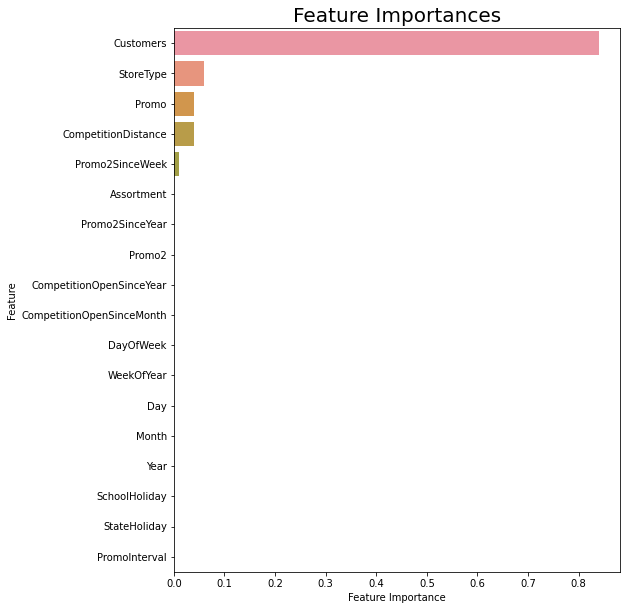

In [ ]:
# Plotting the Horizontal barchart to show the relative feature importance
plt.figure(figsize=(8,10))
plt.title('Feature Importances', fontsize=20)
# plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
# plt.yticks(range(len(indices)), features[indices])
# plt.xlabel('Relative Importance')
sns.barplot(x=importance_df['Feature Importance'], y= importance_df['Feature'])

Observation:- As per our model; Customer, store Type and Promo are the most important features which are having the most impact on Target Variable i.e. Sales Column.

### **Conclusion from Model**


By Looking at the evaluation metrices obtained on implementing different sort of regression model, we decided to go with the Random Forest Tuned model.The maximum R^2 was seen in tuned Random Forest model with the value 0.97267. It means our best accurate model is able to explain approx/almost 97% of variances in the datasets.

Based on our model; Customer, store Type, Promo & CompetitionDistance are the most impactful features which are driving the sales more as compared to other features present in the dataset.

### **Suggestions From our Analysis**

1. More stores should be encouraged for promotion.

2. Store type 'b' should be increased in number.

3. There is seasonality involved. Hence, the stores should be encouraged to promote and take advantages of the holidays.


**THANK YOU...** 

**Hope our best model will help the Store managers to predict the daily sales accuartely in advance. CHEERS ✌!!!**